In [1]:
# Add the parent directory to sys.path
import sys, os
from pathlib import Path

current_directory = os.getcwd()
parent_directory = Path(current_directory).parent.parent
sys.path.insert(0, str(parent_directory))
sys.path

['c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\DLLs',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\Lib',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv',
 '',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\win32',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\Pythonwin']

# Connect to database

In [2]:
# Import the utils moudle
from scripts import utils

In [3]:
# Load the credentialsand connect to database
CREDENTIALS  = utils.load_environment_variables(parent_directory=parent_directory)
connection = utils.connect_to_database({"dbname": CREDENTIALS['DB_NAME'],
                                 "user": CREDENTIALS['USER'],
                                 "host": CREDENTIALS['host'],
                                 "port": CREDENTIALS['port']})

INFO:scripts.utils:Trying to load environment variables from c:\Users\mekbi\Desktop\Kifiya\week-2\telecom-data-analysis/.env
INFO:scripts.utils:Credentials loaded successfully
INFO:scripts.utils:Attempting to connect to the database
INFO:scripts.utils:Connection successful


In [4]:
# Load the db files into pandas dataframe and close the connection
table_name = 'xdr_data'
df = utils.load_data_from_db(conn=connection,
                       table_name=table_name)
utils.close_database_connection(conn=connection)

INFO:root:Executing query: SELECT * FROM xdr_data
c:\Users\mekbi\Desktop\Kifiya\week-2\telecom-data-analysis\scripts\utils.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
INFO:scripts.utils:Data loaded into DataFrame successfully
INFO:root:Database connection closed successfully


# Engagement analysis

In [5]:
# Inspect dataset
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Aggregate relevant metrics for each user

In [6]:
# Aggregate session duration per customer
session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
session_duration.columns = ['MSISDN/Number', 'Session Dur. (ms)']
session_duration.head()

,MSISDN/Number,Session Dur. (ms)
0,3.360100e+10,116720.0
1,3.360100e+10,181230.0
2,3.360100e+10,134969.0
3,3.360101e+10,49878.0
4,3.360101e+10,37104.0


In [7]:
# Calculate the session frequency per customer
session_frequency = df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
session_frequency.columns = ['MSISDN/Number', 'Session Frequency']
session_frequency.head()

,MSISDN/Number,Session Frequency
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


In [8]:
# Calculate total traffic per user
df['Total Data (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
total_traffic = df.groupby('MSISDN/Number')['Total Data (Bytes)'].sum().reset_index()
total_traffic.head()

,MSISDN/Number,Total Data (Bytes)
0,3.360100e+10,8.786906e+08
1,3.360100e+10,1.568596e+08
2,3.360100e+10,5.959665e+08
3,3.360101e+10,4.223207e+08
4,3.360101e+10,1.457411e+09


In [9]:
# Merge all the data frames on MSISDN
import pandas as pd
relevant_df = pd.merge(session_duration, session_frequency, on='MSISDN/Number')
relevant_df = pd.merge(relevant_df, total_traffic, on='MSISDN/Number')
relevant_df.head()

,MSISDN/Number,Session Dur. (ms),Session Frequency,Total Data (Bytes)
0,3.360100e+10,116720.0,1,8.786906e+08
1,3.360100e+10,181230.0,1,1.568596e+08
2,3.360100e+10,134969.0,1,5.959665e+08
3,3.360101e+10,49878.0,1,4.223207e+08
4,3.360101e+10,37104.0,2,1.457411e+09


In [10]:
# Save the relevant engagement data to load in the satisfaction analysis
relevant_df.to_pickle('engagement_data.pkl')

### The top 10 users based on each metric

##### Top 10 users based on session duration

In [11]:
# Sort by Session Duration and select the top 10 customers
top_10_session_duration = relevant_df.sort_values(by='Session Dur. (ms)', ascending=False).head(10)
top_10_session_duration

,MSISDN/Number,Session Dur. (ms),Session Frequency,Total Data (Bytes)
13180,3.362578e+10,18553754.0,17,8.499621e+09
6437,3.361489e+10,9966898.0,17,8.846226e+09
92923,3.376054e+10,9279434.0,15,8.514774e+09
13526,3.362632e+10,8791927.0,18,7.971167e+09
65118,3.366716e+10,8744914.0,13,5.618394e+09
50281,3.366284e+10,6614270.0,9,4.000098e+09
57160,3.366469e+10,6288730.0,9,5.682007e+09
666,3.360313e+10,6287761.0,12,4.976195e+09
66029,3.366746e+10,5649882.0,6,2.600522e+09
92577,3.376041e+10,5321667.0,12,7.132371e+09


##### Top 10 users based on session frequency

In [12]:
# # Sort by Session Frequency and select the top 10 customers
top_10_session_frequency = relevant_df.sort_values(by='Session Frequency', ascending=False).head(10)
top_10_session_frequency

,MSISDN/Number,Session Dur. (ms),Session Frequency,Total Data (Bytes)
13526,3.362632e+10,8791927.0,18,7.971167e+09
13180,3.362578e+10,18553754.0,17,8.499621e+09
6437,3.361489e+10,9966898.0,17,8.846226e+09
37052,3.365973e+10,4035428.0,16,7.705863e+09
92923,3.376054e+10,9279434.0,15,8.514774e+09
76363,3.367588e+10,4865947.0,15,7.891111e+09
65118,3.366716e+10,8744914.0,13,5.618394e+09
1279,3.360452e+10,5207990.0,12,5.487855e+09
13994,3.362708e+10,4703516.0,12,5.754731e+09
666,3.360313e+10,6287761.0,12,4.976195e+09


##### Top 10 users based on Total Traffic

In [13]:
# Sort by Session Duration and select the top 10 customers
top_10_total_traffic = relevant_df.sort_values(by='Total Data (Bytes)', ascending=False).head(10)
top_10_total_traffic

,MSISDN/Number,Session Dur. (ms),Session Frequency,Total Data (Bytes)
6437,3.361489e+10,9966898.0,17,8.846226e+09
92923,3.376054e+10,9279434.0,15,8.514774e+09
13180,3.362578e+10,18553754.0,17,8.499621e+09
13526,3.362632e+10,8791927.0,18,7.971167e+09
76363,3.367588e+10,4865947.0,15,7.891111e+09
37052,3.365973e+10,4035428.0,16,7.705863e+09
63028,3.366646e+10,4536757.0,11,7.308501e+09
92577,3.376041e+10,5321667.0,12,7.132371e+09
57241,3.366471e+10,2927785.0,11,6.872018e+09
86455,3.369879e+10,5169128.0,11,6.540899e+09


### Clustering data into three groups and descriptive statistics for cluster data

In [14]:
# Import engagement utilities
from scripts import enagagement_utils

In [15]:
# Convert the bytes to megabytes for total traffic
modified_df = enagagement_utils.convert_bytes_to_gigabytes(df=relevant_df,
                                                    bytes_column='Total Data (Bytes)',
                                                    gb_column='Total Data (GB)')
modified_df.head()

INFO:root:Conversion of 'Total Data (Bytes)' to gigabytes in column 'Total Data (GB)' successful


,MSISDN/Number,Session Dur. (ms),Session Frequency,Total Data (GB)
0,3.360100e+10,116720.0,1,0.818344
1,3.360100e+10,181230.0,1,0.146087
2,3.360100e+10,134969.0,1,0.555037
3,3.360101e+10,49878.0,1,0.393317
4,3.360101e+10,37104.0,2,1.357320


In [16]:
# Convert duration seconds to hours
modified_df = enagagement_utils.convert_milliseconds_to_minutes(df=modified_df,
                                                                ms_column='Session Dur. (ms)',
                                                                min_column='Session Dur. (min)')
modified_df.head()

INFO:root:Conversion of 'Session Dur. (ms)' to minutes in column 'Session Dur. (min)' successful


,MSISDN/Number,Session Frequency,Total Data (GB),Session Dur. (min)
0,3.360100e+10,1,0.818344,1.945333
1,3.360100e+10,1,0.146087,3.020500
2,3.360100e+10,1,0.555037,2.249483
3,3.360101e+10,1,0.393317,0.831300
4,3.360101e+10,2,1.357320,0.618400


In [17]:
# Normalize and cluster data
normalized_data = enagagement_utils.normalize_data(df=modified_df)
cluster = enagagement_utils.cluster_data(normalized_df=normalized_data)
modified_df['Cluster'] = cluster
modified_df.head()

TypeError: cluster_data() got an unexpected keyword argument 'normalized_df'

In [19]:
# Group the DataFrame by the 'Cluster' column
clustred_data = modified_df.groupby('Cluster')
clustred_data.head()

,MSISDN/Number,Session Frequency,Total Data (GB),Session Dur. (min),Cluster
0,3.360100e+10,1,0.818344,1.945333,1
1,3.360100e+10,1,0.146087,3.020500,1
2,3.360100e+10,1,0.555037,2.249483,1
3,3.360101e+10,1,0.393317,0.831300,1
4,3.360101e+10,2,1.357320,0.618400,2
5,3.360101e+10,2,0.572966,4.233050,1
6,3.360101e+10,2,0.609758,2.139333,2
8,3.360101e+10,2,0.922132,8.261700,2
20,3.360103e+10,2,1.520627,1.227900,2
21,3.360103e+10,2,1.045747,3.779200,2


In [22]:
# Compute the minimum, maximum, average, and total for each metric
metrics = ['Session Dur. (min)','Session Frequency','Total Data (GB)']

min_metrics = clustred_data[metrics].min()
max_metrics = clustred_data[metrics].max()
total_metrics = clustred_data[metrics].sum()
avg_metrics = clustred_data[metrics].mean()

# Display descriptive statistics
print("Minimum Metrics for each Cluster:")
print(min_metrics)

print("\nMaximum Metrics for each Cluster:")
print(max_metrics)

print("\nTotal Metrics for each Cluster:")
print(total_metrics)

print("\nAverage Metrics for each Cluster:")
print(avg_metrics)

Minimum Metrics for each Cluster:
         Session Dur. (min)  Session Frequency  Total Data (GB)
Cluster                                                        
0                  0.822050                  3         1.011411
1                  0.119033                  0         0.030966
2                  0.303917                  1         0.264699

Maximum Metrics for each Cluster:
         Session Dur. (min)  Session Frequency  Total Data (GB)
Cluster                                                        
0                309.229233                 18         8.238690
1                 26.223667                  2         1.329091
2                 52.913733                  4         1.784351

Total Metrics for each Cluster:
         Session Dur. (min)  Session Frequency  Total Data (GB)
Cluster                                                        
0              38079.606950              17000      8530.837025
1             146348.145583              85262     37779.250492
2 

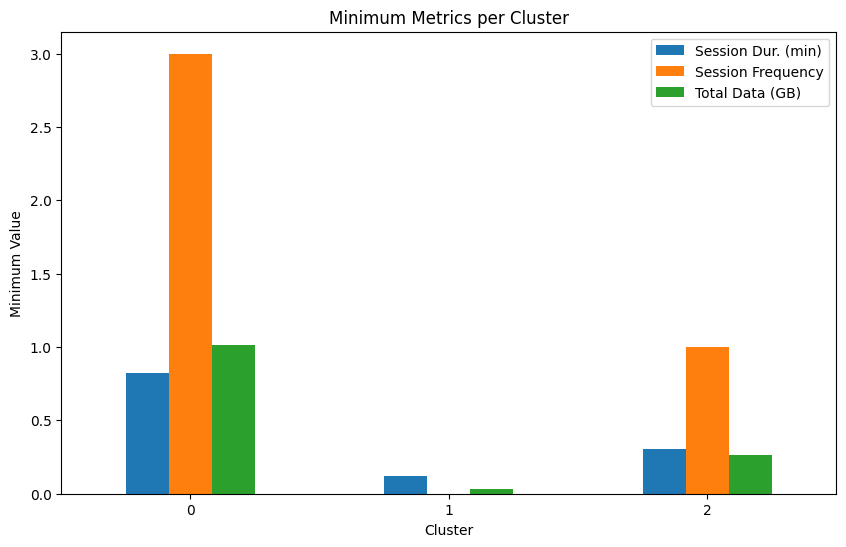

In [23]:
# Draw barcharts for each statistical metric
import matplotlib.pyplot as plt

# Bar plot for minimum metrics per cluster
min_metrics.plot(kind='bar', figsize=(10,6))
plt.title('Minimum Metrics per Cluster')
plt.ylabel('Minimum Value')
plt.xticks(rotation=0)
plt.show()



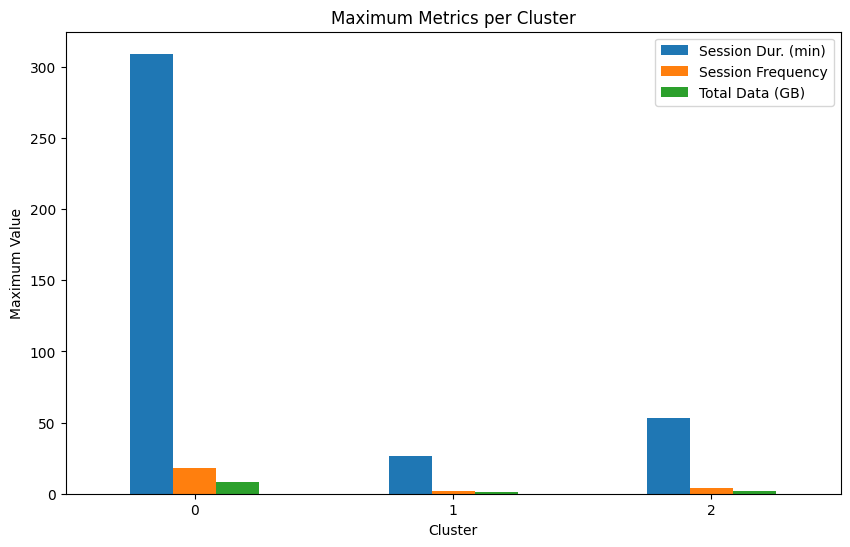

In [24]:
# Bar plot for maximum metrics per cluster
max_metrics.plot(kind='bar', figsize=(10,6))
plt.title('Maximum Metrics per Cluster')
plt.ylabel('Maximum Value')
plt.xticks(rotation=0)
plt.show()

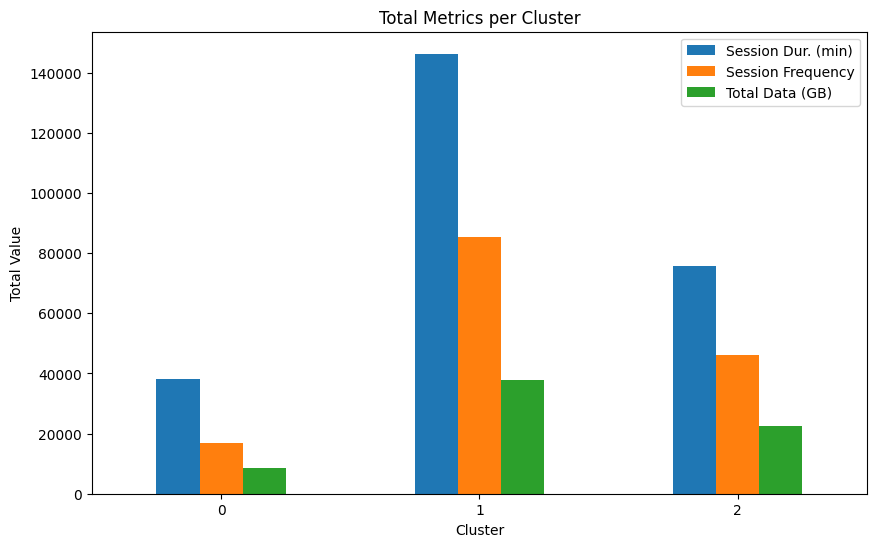

In [25]:
# Bar plot for total metrics per cluster
total_metrics.plot(kind='bar', figsize=(10,6))
plt.title('Total Metrics per Cluster')
plt.ylabel('Total Value')
plt.xticks(rotation=0)
plt.show()

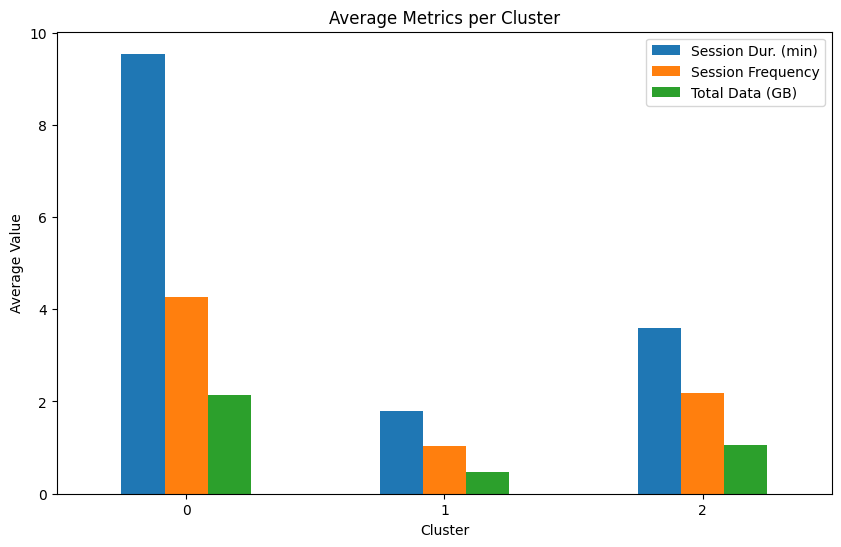

In [26]:
# Bar plot for average metrics per cluster
avg_metrics.plot(kind='bar', figsize=(10,6))
plt.title('Average Metrics per Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()

# Interpretaions based on cluster data metrics

## Cluster 0 (High Engagement)
- Average Session Duration: 9.54 minutes, which is relatively high, suggesting users in this group spend a considerable amount of time per session.
- Average Session Frequency: 4.26 sessions per user, indicating regular and consistent usage.
- Average Data Usage: 2.14 GB, the highest among all clusters.

- Insight: This cluster represents high-engagement users who frequently access the network and consume large amounts of data. These users are likely to be power users, and it is crucial to maintain their satisfaction through premium features, loyalty rewards, or tailored services. They form a valuable segment that can drive revenue growth if properly nurtured.

## Cluster 1 (Very Low Engagement)

- Average Session Duration: 1.79 minutes, the lowest of all clusters, suggesting very brief interactions.
- Average Session Frequency: Around 1 session per user, indicating very infrequent usage.
- Average Data Usage: 0.46 GB, the lowest data consumption across clusters.

- Insight: Users in this cluster show minimal engagement, with very brief sessions and low data consumption. These are at-risk customers who may churn if not addressed. Offering personalized promotions, improved network performance, or educational campaigns to demonstrate the value of the service could encourage them to increase their usage.

## Cluster 2 (Moderate Engagement)

- Average Session Duration: 3.59 minutes, which is higher than Cluster 1 but lower than Cluster 0, indicating moderate interaction levels.
- Average Session Frequency: 2.19 sessions per user, suggesting occasional but more frequent engagement than Cluster 1.
- Average Data Usage: 1.06 GB, indicating moderate data usage.

- Insight: This cluster represents users with moderate engagement. They are more active than those in Cluster 1 but less so than the high-engagement users in Cluster 0. These users could potentially increase their engagement with the right incentives, such as promotions, data plans, or bundled offers. They are already somewhat engaged, so nurturing them with occasional rewards or better service options could push them into higher usage levels.

## Summary

- Cluster 0 (High Engagement): High session duration, frequency, and data usage. These are your most valuable users.
- Cluster 1 (Very Low Engagement): Low across all metrics. These users are disengaged and need incentives to remain active.
- Custer 2 (Moderate Engagement): Moderate in all metrics. This group has potential for growth and could become high-engagement users with the right strategies.

- Focusing on retaining Cluster 0 and nurturing Cluster 2 users will likely have the biggest impact on overall engagement, while Cluster 1 users require specific interventions to prevent churn.